<h1 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Motion Activity Classification Using Recurrent Neural Networks </centre></strong></h1>

<h2 style="background-color:#C2B4B9;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Methodology: Transforming and Splitting the Data</centre></strong></h2>

#### 02. Data Preprocessing <a class="anchor" id="data"></a>
##### Effective data transformation and splitting strategies are critical for building robust deep learning models. This section will cover data normalization, target encoding, and splitting the dataset into training, validation, and test sets.

---

### **Índice do documento** 
    
3. [Data Preprocessing](#3.-Data-Preprocessing)

    3.1 [Normalize the Data](#3.1-Normalize-the-Data)
    
    3.2 [Handle missing values if any](#3.2-Handle-missing-values-if-any)

    3.3 [Encode the target labels (activities) for classification](#3.3-)
    
    

## **2.1 Carregamento das Bibliotecas Base**

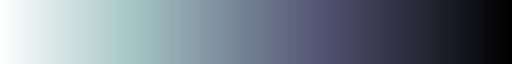

In [48]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
sns.color_palette("bone_r", as_cmap=True)

## **2.2 Carregamento do *Dataset***

In [49]:
# Definir o caminho do arquivo relativo ao diretório do script
#file_path = os.path.join(os.getcwd(), 'RNN_dataset', 'concatDataset.csv')

In [50]:
base_dir = r'C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\datasets'
file_name = 'concatDataset.csv'

file_path = os.path.join(base_dir, file_name)
print(file_path)

C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\datasets\concatDataset.csv


In [51]:
df_motionSense = pd.read_csv(file_path)

In [52]:
df_motionSense.head(5)

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,subject_id,session_id,category,age,gender,height,weight
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,1,1,dws,46,1,188,102
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,1,1,dws,46,1,188,102
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,1,1,dws,46,1,188,102
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,1,1,dws,46,1,188,102
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,1,1,dws,46,1,188,102


## **2.3 Data Preprocessing: Removing Unnecessary Columns**

In this Python code, a copy of the original DataFrame 'data_frame' is created. Subsequently, several columns ('Unnamed: 0', 'subject_id', 'session_id', 'age', 'gender', 'height', and 'weight') are removed from the copied DataFrame 'df' to streamline the dataset for further analysis.

In [53]:
#df = df_motionSense.copy() #making a copy of original dataframe
#df.drop('Unnamed: 0', axis=1, inplace=True)
#df.drop('subject_id', axis=1, inplace=True)
#df.drop('session_id', axis=1, inplace=True)
#df.drop('age', axis=1, inplace=True)
#df.drop('gender', axis=1, inplace=True)
#df.drop('height', axis=1, inplace=True)
#df.drop('weight', axis=1, inplace=True)
#df


df = df_motionSense.copy() #making a copy of original dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('subject_id', axis=1, inplace=True)
df.drop('session_id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)

df.head(5)

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,category
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,dws
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,dws
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,dws
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,dws
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,dws


In [54]:
#making sure that there are no missing values hidden as a question mark
df.replace("?",np.nan,inplace=True)

## **2.4 Encoding Categorical Data for Machine Learning**

Following Python code snippet utilizes the 'LabelEncoder' from the scikit-learn library to transform the 'category' column in the DataFrame 'df' into numerical codes. These codes are stored in a new 'code' column, and the original 'category' column is subsequently removed from the DataFrame, preparing the data for machine learning tasks.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633429 entries, 0 to 633428
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   attitude.roll       633429 non-null  float64
 1   attitude.pitch      633429 non-null  float64
 2   attitude.yaw        633429 non-null  float64
 3   gravity.x           633429 non-null  float64
 4   gravity.y           633429 non-null  float64
 5   gravity.z           633429 non-null  float64
 6   rotationRate.x      633429 non-null  float64
 7   rotationRate.y      633429 non-null  float64
 8   rotationRate.z      633429 non-null  float64
 9   userAcceleration.x  633429 non-null  float64
 10  userAcceleration.y  633429 non-null  float64
 11  userAcceleration.z  633429 non-null  float64
 12  category            633429 non-null  object 
dtypes: float64(12), object(1)
memory usage: 62.8+ MB


### **USA-SE O DUMMIES? ou o labelEncoder??**
+ Conversão da coluna *'sentiment'* em valores binários usando o `LabelEncoder` da biblioteca sklearn

In [56]:
##df = pd.get_dummies(df, columns=['category']).astype(int)
#df

In [57]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

encoder = LabelEncoder()
df['category_encoded'] = encoder.fit_transform(df['category'])

print(encoder.classes_)
print(df['category'].value_counts())

['dws' 'ups' 'wlk']
category
wlk    344288
ups    157285
dws    131856
Name: count, dtype: int64


In [58]:
# minimax saclare é aos dados de treino
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features = df.drop(columns=['category', 'category_encoded'])

scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

In [59]:
scaled_df['category_encoded'] = df['category_encoded']

In [60]:
scaled_df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,category_encoded
0,1.021959,1.107385,0.417181,2.406195,-0.829476,0.358419,0.201954,0.523800,1.149716,0.877204,-0.498997,0.725271,0
1,1.021865,1.153671,0.405934,2.444120,-0.881869,0.356343,0.541955,0.276988,0.671182,0.661825,-0.067095,0.090614,0
2,1.021713,1.181012,0.401818,2.466163,-0.913179,0.354734,-0.092472,-0.047588,0.344296,0.066402,0.126678,-0.592361,0
3,1.014353,1.187365,0.404709,2.469880,-0.920496,0.324710,-0.019243,-0.750886,0.009028,0.011899,0.130769,0.042514,0
4,0.999076,1.189446,0.403053,2.467690,-0.922890,0.262797,0.070893,-0.656115,0.021537,0.604865,0.556535,-0.293948,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
633424,0.595235,-0.444795,0.050648,0.596444,0.388156,-0.125841,-0.598683,0.264649,-0.447566,0.161597,-0.538360,0.308161,2
633425,0.621323,-0.495631,0.071307,0.569358,0.407971,-0.058409,-0.600863,0.142405,-0.598656,0.225133,-0.573702,0.357039,2
633426,0.645821,-0.552527,0.092940,0.531121,0.428507,0.008762,-0.630935,-0.017011,-0.706934,0.018832,-0.243287,0.394480,2
633427,0.671958,-0.613327,0.118130,0.485847,0.448525,0.076606,-0.653794,-0.094724,-0.802490,0.013674,-0.145057,0.283587,2


In [61]:
base_dir = r'C:\\Users\\maria\\OneDrive - Instituto Superior de Engenharia do Porto\\Desktop\\Semestre\\APROF\\mei-approf\\RNN\\datasets'
file_name = 'preprocessDataset.csv'

file_path = os.path.join(base_dir, file_name)

scaled_df.to_csv(file_path, index=False)